<a href="https://colab.research.google.com/github/aioshi21chowdhury/emotion_recognisation/blob/main/face_emotion(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [6]:
data_dir="data"
image_exts=['jpeg','jpg','bmp','png']

In [7]:
os.listdir(os.path.join(data_dir,'sad'))

['crying-sad.gif',
 'vector-sad-man-sitting-silhouette.jpg',
 'CC_HE_1221887081_SituationalDepression-650x428.jpg',
 '640px-Crying-girl.jpg',
 'people-1492052_1920-1024x681.jpg',
 'what-successful-people-do-when-they-are-sad-1200x900.jpg',
 'sad-person-pictures-2bnso9uiwlhrikrx.jpg',
 'How-To-Make-Someone-Happy-When-Theyre-Sad.jpg',
 'b2ap3_large_happy-sad-unsplash-850x575.jpg',
 'sad-people-group-therapy-session_23-2148752071.jpg',
 '766x415_Depression_vs_Sadness-1-732x415.jpg',
 'dark-depression-mood-people-wallpaper-preview.jpg',
 '107188144-1675355909384-gettyimages-1302154722-dsc_9175.jpeg',
 'Sad-man-sitting-in-bedroom-header.jpg',
 '360_F_548848756_IlV9Y9HV8chb6mSuc3PBamYRT9gIn8Vo.jpg',
 'rtor_guest-blog_fetured-image_Depression-versus-Sadness-How-to-Recognize-and-Cope.jpg',
 'image-asset.jpeg',
 'strated-depressed-man-sitting-on-plastic-stool-3d-white-people-man-character.jpg',
 '5acf9ed1146e711e008b46d7.jpg',
 'lonely-depressed-person-sitting-near-brick-wall_181624-30778.jpg',

In [8]:
img=cv2.imread(os.path.join(data_dir,'sad','-unhappy-miss-good-chance-dressed-casually-isolated-yellow-wall_273609-37534.jpg'))

In [9]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Image not in ext list data/sad/crying-sad.gif
Image not in ext list data/sad/people-1492052_1920-1024x681.jpg
Image not in ext list data/sad/sad-person-pictures-2bnso9uiwlhrikrx.jpg
Image not in ext list data/sad/strated-depressed-man-sitting-on-plastic-stool-3d-white-people-man-character.jpg
Image not in ext list data/sad/secret-signs-of-loneliness-01-1440x810.jpg
Image not in ext list data/sad/depositphotos_11207956-stock-photo-thoughtful-man-in-the-living.jpg
Image not in ext list data/sad/39843138-sad-man.jpg
Image not in ext list data/sad/very-sad-man-sitting-alone-on-white-background-depressed-young-man-sitting-businessman-vector.jpg
Image not in ext list data/sad/portrait-sad-man-260nw-126009806.jpg
Image not in ext list data/sad/depositphotos_86851530-stock-photo-close-up-of-african-young.jpg
Image not in ext list data/sad/african-american-depressive-sad-broken-260nw-475790911.jpg
Image not in ext list data/sad/depressed-man-studio-shot-260nw-404652526.jpg
Image not in ext list

load data


In [10]:
import tensorflow as tf


In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 160 files belonging to 2 classes.


In [13]:
data_iterator=data.as_numpy_iterator()
batch=data_iterator.next( )

In [14]:
len(batch)#-------2 means one is image and one is the label

2

In [15]:
#image
batch[0].shape

(32, 256, 256, 3)

In [16]:
#lable
batch[1]
# 0 mane hoche happy people , 1 mane sad people

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int32)

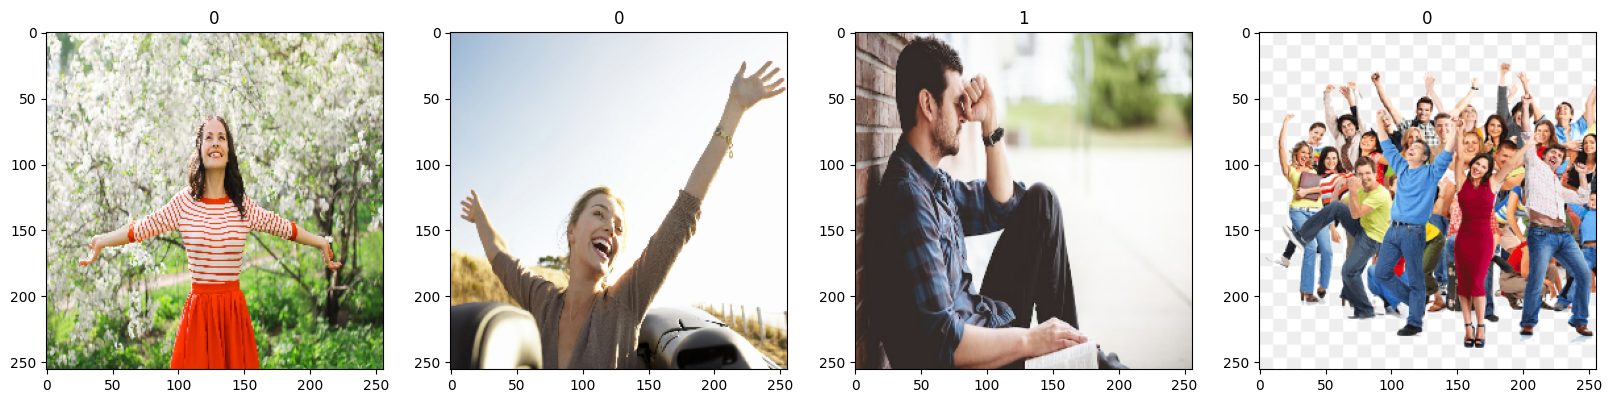

In [17]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

#preprocess the data


In [18]:
# print((batch[0]).max())
# scaled=batch[0]/255
# scaled.max()
data=data.map(lambda x,y: (x/255,y))#works on data pipeline

In [19]:
data.as_numpy_iterator().next()[0].max()


1.0

#split data train and test the data


In [20]:
len(data)

5

In [21]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)

In [22]:
train_size+val_size+test_size

4

In [23]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)
#first the train is taken and validation and test is been skipped

#finally into deep learning ^_^

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [25]:
model=Sequential()
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

#train


In [42]:
logdir='logs'
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)# kisher jonno jani na ??--- may be to save the performance of the model

In [43]:
hist=model.fit(train,epochs=19,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/19
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.9727 - loss: 0.1297 - val_accuracy: 1.0000 - val_loss: 0.1272
Epoch 2/19
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.9948 - loss: 0.1005 - val_accuracy: 1.0000 - val_loss: 0.0779
Epoch 3/19
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.9479 - loss: 0.1151 - val_accuracy: 0.9688 - val_loss: 0.0715
Epoch 4/19
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 1.0000 - loss: 0.0810 - val_accuracy: 0.9688 - val_loss: 0.0755
Epoch 5/19
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.9805 - loss: 0.0942 - val_accuracy: 1.0000 - val_loss: 0.0514
Epoch 6/19
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 1.0000 - loss: 0.0434 - val_accuracy: 1.0000 - val_loss: 0.0245
Epoch 7/19
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.9948 - loss: 0.0610 - val_accuracy: 1.0000 - val_loss: 0.0416
Epoch 8/19
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 1.0000 - loss: 0.0367 - val_accuracy: 1.0000 - val_loss: 0.0206
Epoch 9/

In [44]:
# Print final training and validation loss and accuracy
final_train_loss = hist.history['loss'][-1]
final_val_loss = hist.history['val_loss'][-1]
final_train_accuracy = hist.history['accuracy'][-1]
final_val_accuracy = hist.history['val_accuracy'][-1]

print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")
print(f"Final Training Accuracy: {final_train_accuracy:.4f}")
print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")


Final Training Loss: 0.0040
Final Validation Loss: 0.0040
Final Training Accuracy: 1.0000
Final Validation Accuracy: 1.0000


#plot the performance

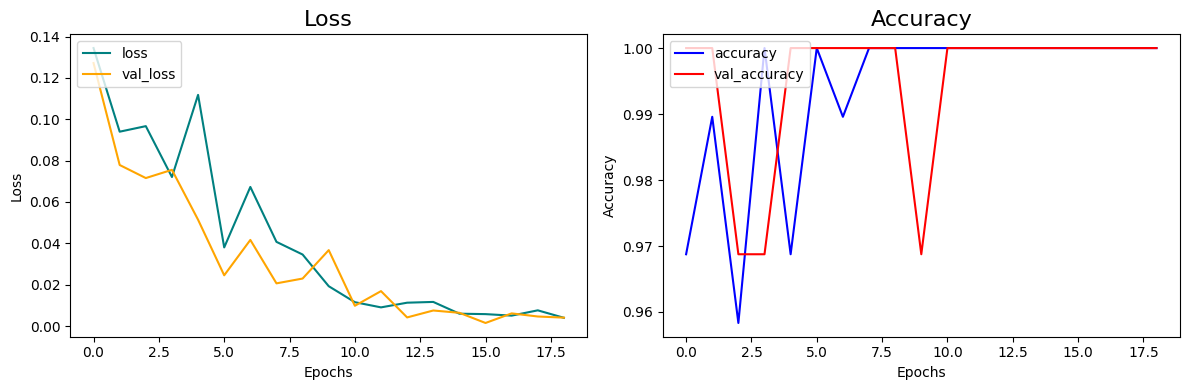

In [45]:
import matplotlib.pyplot as plt

# Create subplots with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(12, 4))  # Adjust figsize for smaller graphs

# Plot Loss
ax[0].plot(hist.history['loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_loss'], color='orange', label='val_loss')
ax[0].set_title('Loss', fontsize=16)
ax[0].legend(loc="upper left")
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')

# Plot Accuracy
ax[1].plot(hist.history['accuracy'], color='blue', label='accuracy')
ax[1].plot(hist.history['val_accuracy'], color='red', label='val_accuracy')
ax[1].set_title('Accuracy', fontsize=16)
ax[1].legend(loc="upper left")
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

# Display the plot
plt.tight_layout()
plt.show()


#evaluate and testing

In [46]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [47]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [50]:
for batch in test.as_numpy_iterator():
  X,y=batch
  yhat=model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)
#

In [51]:
precision = pre.result().numpy()
recall = re.result().numpy()
accuracy = acc.result().numpy()

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')

Precision: 0.0000
Recall: 0.0000
Accuracy: 0.0000


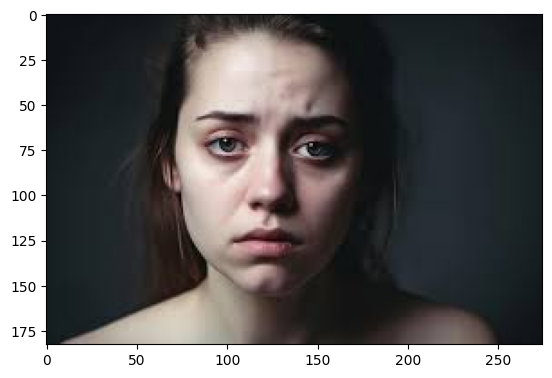

In [54]:
img=cv2.imread('images.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()


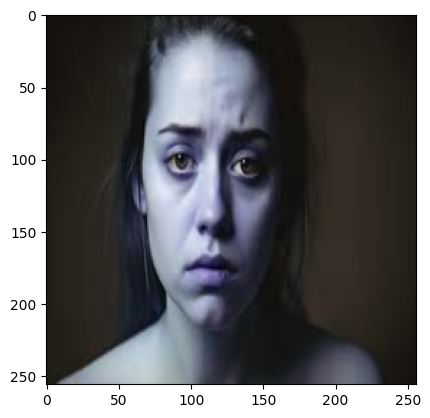

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
[[0.99962515]]
Predicted class is sad 🥲


In [55]:
resize=tf.image.resize(img,(256,256))

plt.imshow(resize.numpy().astype(int))
plt.show()
yhat=model.predict(np.expand_dims(resize/255,0))
print(yhat)
if yhat>0.5:
  print(f'Predicted class is sad 🥲')
else:
  print(f'Predicted class is happy 🙂')

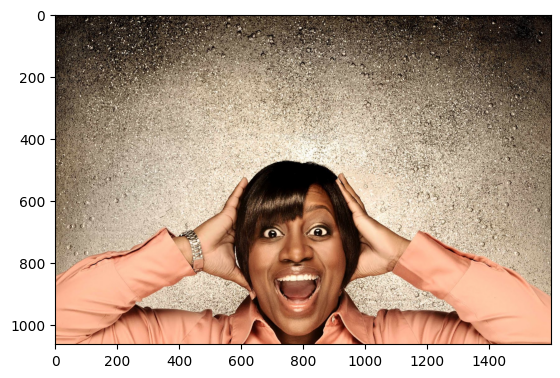

In [56]:
img=cv2.imread('happy_test.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

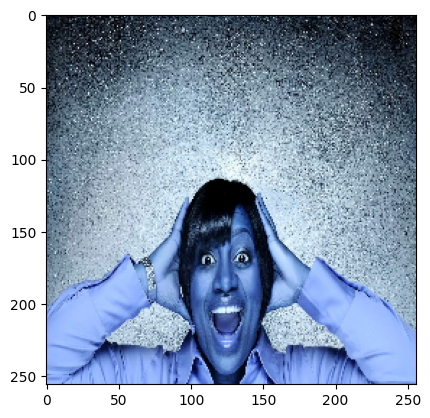

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
[[0.25578353]]
Predicted class is happy 🙂


In [57]:
resize=tf.image.resize(img,(256,256))

plt.imshow(resize.numpy().astype(int))
plt.show()
yhat=model.predict(np.expand_dims(resize/255,0))
print(yhat)
if yhat>0.5:
  print(f'Predicted class is sad 🥲')
else:
  print(f'Predicted class is happy 🙂')

#save the model

In [58]:
from tensorflow.keras.models import load_model


In [59]:
model.save(os.path.join('models','image_binary_classifier.h5'))

In [61]:
import os
from tensorflow.keras.models import load_model

# Assuming the model was saved as 'imageclassifier.h5' in the 'models' directory
new_model = load_model(os.path.join('models','image_binary_classifier.h5'))